In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[link text](https://)

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [161]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Maternal Health Risk Data Set.data')
feature_names = ["Age","SystolicBP","DiastolicBP","BS","BodyTemp","HeartRate","RiskLevel"]
df = pd.DataFrame(data)
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [163]:
dropped_duplicates = df.drop_duplicates()
dropped_duplicates

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


In [164]:
final_df = dropped_duplicates.dropna()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 28.2+ KB


In [165]:
# Initial dataset size
initial_rows, initial_cols = df.shape

# Handle null values
null_values_count = dframe.isnull().sum().sum()
if null_values_count > 0:
    print(f"{null_values_count} null values found in the dataset. Handling null values...")
    df.dropna(inplace=True)
    print("Null values have been removed.")

# Handle duplicates
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print(f"{duplicates_count} duplicate rows found in the dataset. Handling duplicates...")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

562 duplicate rows found in the dataset. Handling duplicates...
Duplicate rows have been removed.


In [166]:
# Updated dataset size
updated_rows, updated_cols = df.shape

# Display basic information about the dataset after cleaning
print("\nDataset Information After Cleaning:")
print(df.info())

# Display summary statistics of the dataset after cleaning
print("\nSummary Statistics After Cleaning:")
print(df.describe())

# Summary of cleaning process
print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")


Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 28.2+ KB
None

Summary Statistics After Cleaning:
              Age  SystolicBP  DiastolicBP          BS    BodyTemp   HeartRate
count  452.000000  452.000000   452.000000  452.000000  452.000000  452.000000
mean    29.194690  110.553097    75.418142    8.346173   98.692478   73.949115
std     13.767379   17.872282    13.754578    2.829209    1.410897    8.156973
min     10.000000   70.000000    49.000000    6.000000   98.000000

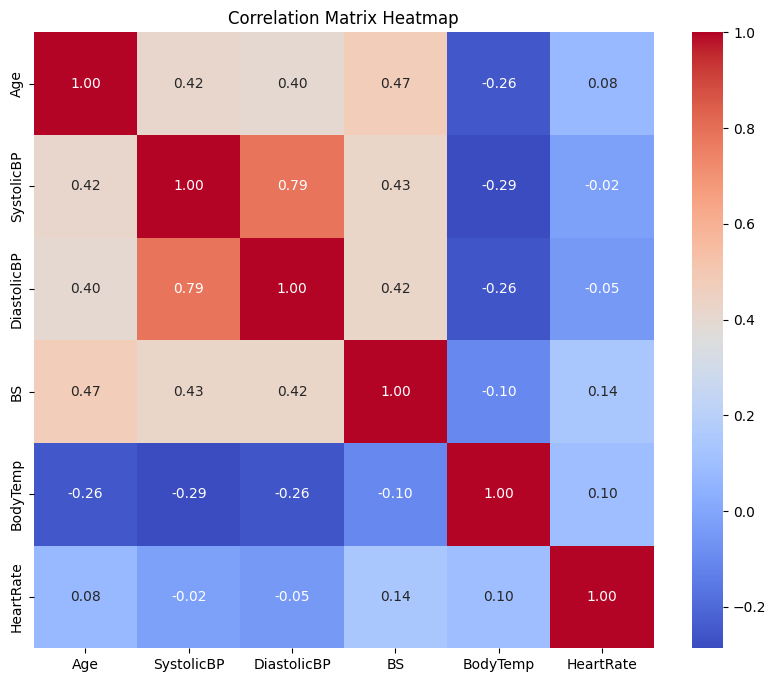

In [167]:
correlation_matrix_all = X.corr()

plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

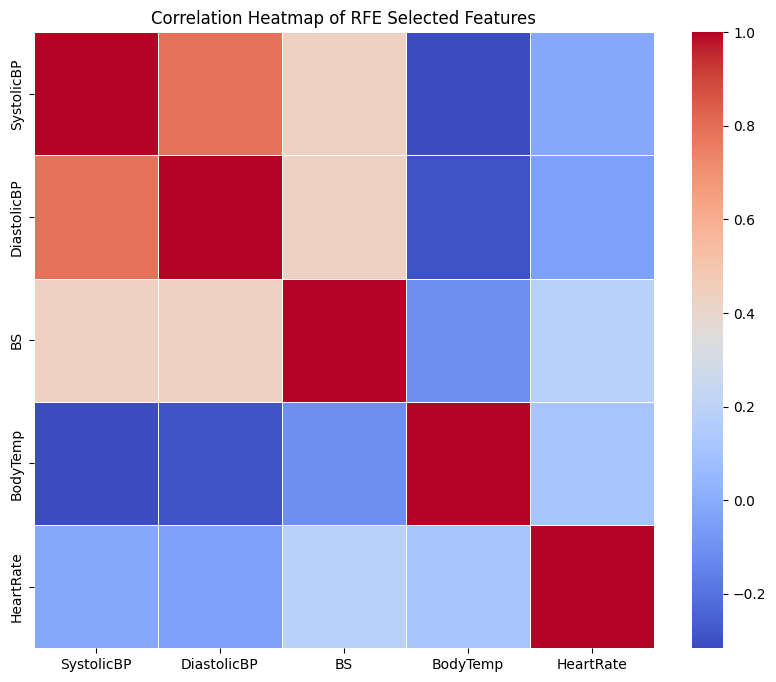

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=5)
rfe.fit(X_train, y_train)

X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

selected_feature_names = [X.columns[i] for i in range(len(rfe.support_)) if rfe.support_[i]]
df_selected_features = pd.DataFrame(X_train_selected, columns=selected_feature_names)

correlation_matrix_selected = df_selected_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

random_seed = 42

# Define models with random seed
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed)
}


In [169]:
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

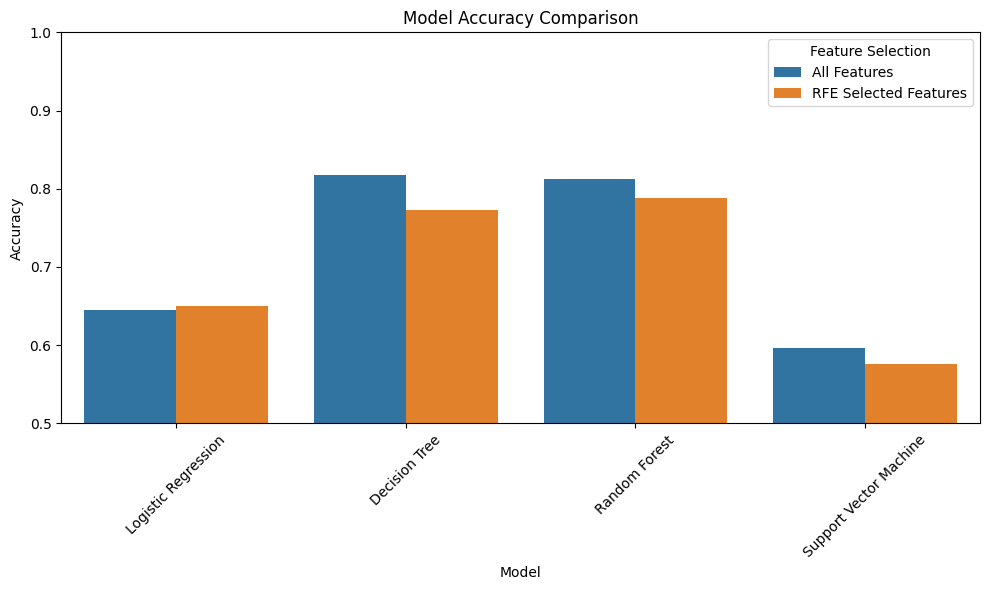

In [175]:
results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(results_all_features.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
    })

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()

In [171]:
# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Print scores before RFE
print("Scores with all features and without any added techniques:")
for name, accuracy in results_all_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

Scores with all features and without any added techniques:
Logistic Regression: 64.53%
Decision Tree: 81.77%
Random Forest: 81.28%
Support Vector Machine: 59.61%


In [172]:
# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy
# Print scores after RFE
print("\nScores with RFE-selected features:")
for name, accuracy in results_rfe_selected_features.items():
    print(f"{name}: {accuracy*100:.2f}%")


Scores with RFE-selected features:
Logistic Regression: 65.02%
Decision Tree: 77.34%
Random Forest: 78.82%
Support Vector Machine: 57.64%


In [173]:
# Cross-validation using different models with selected features
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

cv_scores = {}

for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    cv_scores[model_name] = scores

    print(f"{model_name} Cross-Validation Scores: {scores}")
    print(f"{model_name} Mean Cross-Validation Score: {np.mean(scores)}\n")

Logistic Regression Cross-Validation Scores: [0.63803681 0.64197531 0.62345679 0.61728395 0.60493827]
Logistic Regression Mean Cross-Validation Score: 0.6251382261607211

Decision Tree Cross-Validation Scores: [0.7607362  0.7654321  0.80864198 0.81481481 0.72839506]
Decision Tree Mean Cross-Validation Score: 0.7756040293872605

Random Forest Cross-Validation Scores: [0.76687117 0.75925926 0.82716049 0.81481481 0.75925926]
Random Forest Mean Cross-Validation Score: 0.7854729985609332

Support Vector Machine Cross-Validation Scores: [0.55828221 0.62345679 0.61728395 0.58641975 0.58641975]
Support Vector Machine Mean Cross-Validation Score: 0.5943724911005075



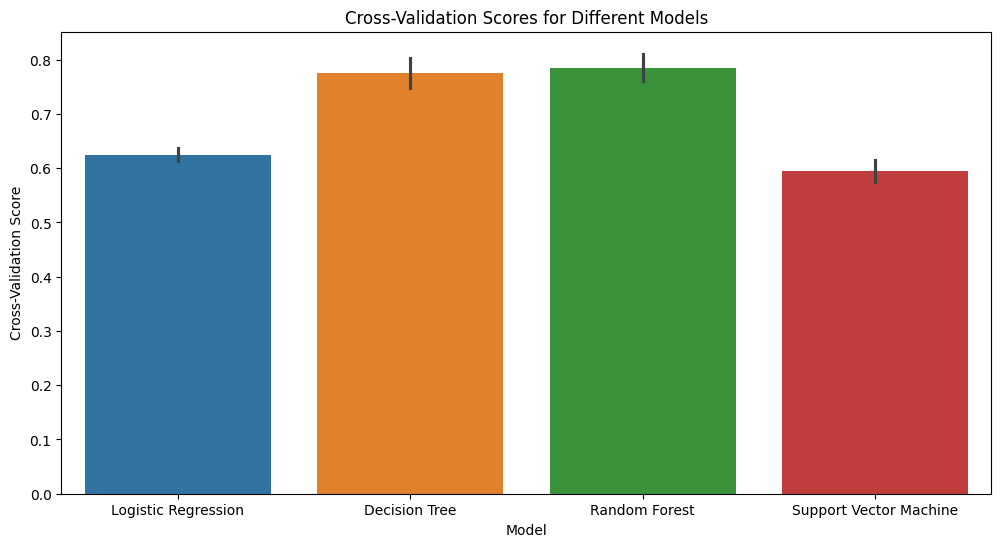

In [174]:
# Plot the cross-validation scores
plt.figure(figsize=(12, 6))
sns.barplot(data=pd.DataFrame(cv_scores))
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Cross-Validation Score')
plt.show()

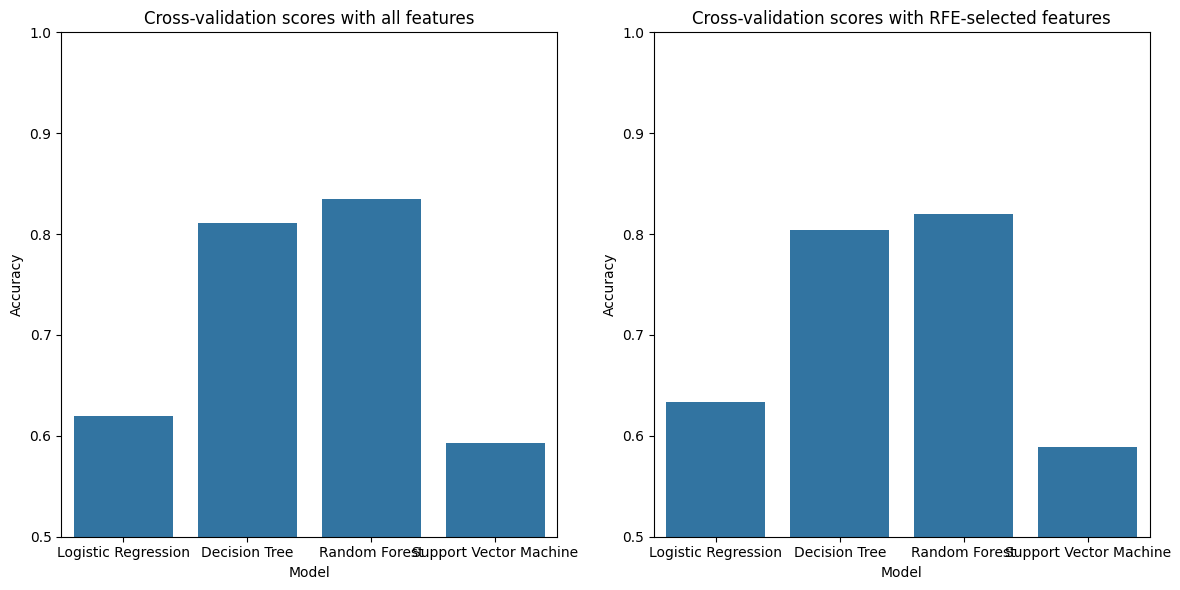

Summary of Cross-validation Model Accuracies with all features:
Logistic Regression: 0.6192
Decision Tree: 0.8115
Random Forest: 0.8352
Support Vector Machine: 0.5926

Summary of Cross-validation Model Accuracies with RFE-selected features:
Logistic Regression: 0.6337
Decision Tree: 0.8040
Random Forest: 0.8200
Support Vector Machine: 0.5894


In [176]:
# Cross-validation with all features
results_all_features_cv = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    results_all_features_cv[name] = np.mean(scores)

# Cross-validation with RFE-selected features
results_rfe_selected_features_cv = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_selected, y_train, cv=10)
    results_rfe_selected_features_cv[name] = np.mean(scores)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(results_all_features_cv.keys()), y=list(results_all_features_cv.values()))
plt.title('Cross-validation scores with all features')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)

plt.subplot(1, 2, 2)
sns.barplot(x=list(results_rfe_selected_features_cv.keys()), y=list(results_rfe_selected_features_cv.values()))
plt.title('Cross-validation scores with RFE-selected features')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

# Print summary of cross-validation scores
print("Summary of Cross-validation Model Accuracies with all features:")
for model, accuracy in results_all_features_cv.items():
    print(f"{model}: {accuracy:.4f}")

print("\nSummary of Cross-validation Model Accuracies with RFE-selected features:")
for model, accuracy in results_rfe_selected_features_cv.items():
    print(f"{model}: {accuracy:.4f}")